# Classification with Natural Language Processing

The dataset is taken from the source "https://www.kaggle.com/datasets/jackksoncsie/spam-email-dataset/data"  
The dataset consists of raw email text as well as identification of spam or legitimate emails. Classification supervised learning with natural language processing such as Naive Bayes, logistic regression, random forest classification, xgboost classification methods are performed on this data to predict whether the email is spam or legitimate from the email text. 

## Importing the libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

## Data visualization

In [3]:
df = pd.read_csv('emails.csv')

In [4]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


#### 1 indicates that it is a spam email and 0 indicates that it is not a spam email.

In [86]:
df.isnull().sum()

text    0
spam    0
dtype: int64

#### There are no missing values

In [6]:
df['spam'].value_counts()

spam
0    4360
1    1368
Name: count, dtype: int64

<Axes: xlabel='spam', ylabel='count'>

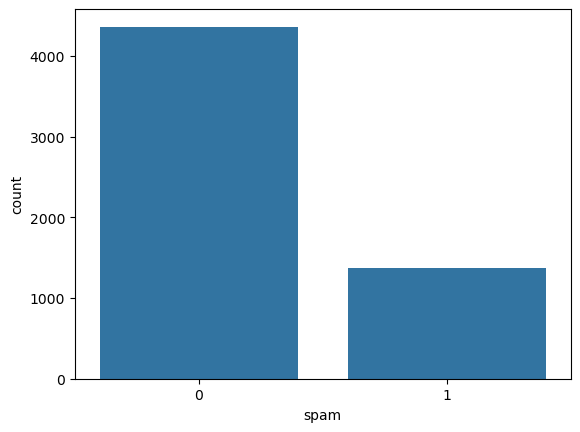

In [8]:
sns.countplot(data=df,x='spam')

#### There are 4360 cases of legitimate emails and 1368 cases of spam emails, thus indicating imbalance of the two classes. This could lead to the problem that the model is biased towards the majority class. 

In [10]:
X= df['text'] #feature

In [11]:
y = df['spam'] #label

## Train test split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## Vectorization

In [18]:
tfidf = TfidfVectorizer(stop_words='english')

In [19]:
X_train_tfidf = tfidf.fit_transform(X_train)

In [20]:
X_test_tfidf = tfidf.transform(X_test)

## Naive Bayes classification 

In [87]:
model = MultinomialNB()

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1314
           1       1.00      0.60      0.75       405

    accuracy                           0.91      1719
   macro avg       0.95      0.80      0.85      1719
weighted avg       0.92      0.91      0.90      1719



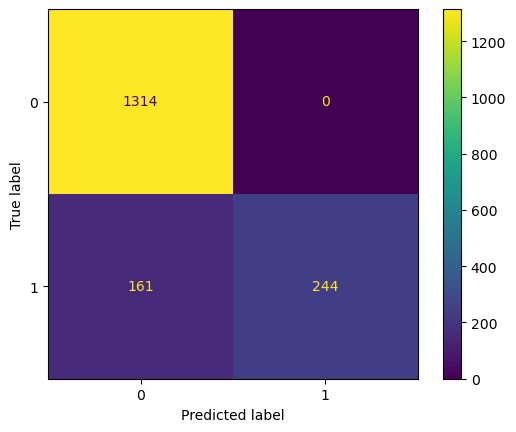

In [88]:
model.fit(X_train_tfidf,y_train)
y_pred = model.predict(X_test_tfidf)
print(classification_report(y_test,y_pred))
ConfusionMatrixDisplay.from_estimator(model,X_test_tfidf,y_test)

There are many spam emails which are not predicted as spam. This could be a result of the class imbalance problem as discussed above.  
This issue is solved by adding the parameter 'class_prior' to the model.

In [89]:
model = MultinomialNB(class_prior = [0.5,0.5])

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1314
           1       1.00      0.82      0.90       405

    accuracy                           0.96      1719
   macro avg       0.97      0.91      0.94      1719
weighted avg       0.96      0.96      0.96      1719



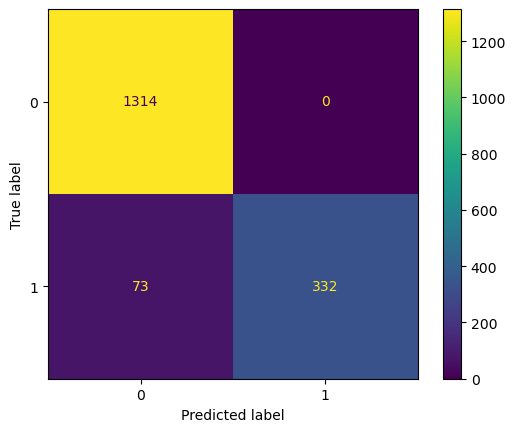

In [90]:
model.fit(X_train_tfidf,y_train)
y_pred = model.predict(X_test_tfidf)
print(classification_report(y_test,y_pred))
ConfusionMatrixDisplay.from_estimator(model,X_test_tfidf,y_test)

#### Hence, addressing the class imbalance issue clearly led to an increase in the performance of the model.

## Logistic regression 

In [65]:
model = LogisticRegression(class_weight='balanced')

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1314
           1       0.96      1.00      0.98       405

    accuracy                           0.99      1719
   macro avg       0.98      0.99      0.99      1719
weighted avg       0.99      0.99      0.99      1719



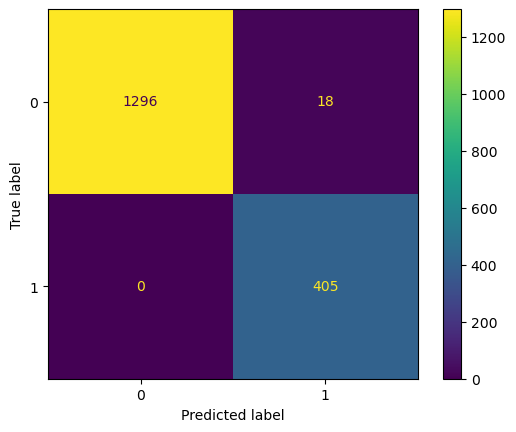

In [66]:
model.fit(X_train_tfidf,y_train)
y_pred = model.predict(X_test_tfidf)
print(classification_report(y_test,y_pred))
ConfusionMatrixDisplay.from_estimator(model,X_test_tfidf,y_test)

## Random forest classifier

In [81]:
model = RandomForestClassifier(class_weight='balanced')

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1314
           1       0.97      0.95      0.96       405

    accuracy                           0.98      1719
   macro avg       0.98      0.97      0.98      1719
weighted avg       0.98      0.98      0.98      1719



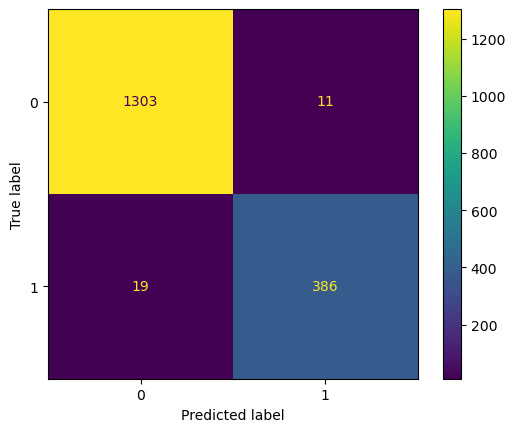

In [82]:
model.fit(X_train_tfidf,y_train)
y_pred = model.predict(X_test_tfidf)
print(classification_report(y_test,y_pred))
ConfusionMatrixDisplay.from_estimator(model,X_test_tfidf,y_test)

## XGboost

In [70]:
pip install xgboost


   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 1.0/150.0 MB 8.4 MB/s eta 0:00:18
    --------------------------------------- 2.4/150.0 MB 6.7 MB/s eta 0:00:23
    --------------------------------------- 3.4/150.0 MB 6.3 MB/s eta 0:00:24
   - -------------------------------------- 5.0/150.0 MB 6.7 MB/s eta 0:00:22
   - -------------------------------------- 6.3/150.0 MB 6.6 MB/s eta 0:00:22
   -- ------------------------------------- 8.1/150.0 MB 7.2 MB/s eta 0:00:20
   -- ------------------------------------- 10.2/150.0 MB 7.6 MB/s eta 0:00:19
   --- ------------------------------------ 12.3/150.0 MB 8.0 MB/s eta 0:00:18
   --- ------------------------------------ 14.2/150.0 MB 8.2 MB/s eta 0:00:17
   ---- ----------------------------------- 16.5/150.0 MB 8.4 MB/s eta 0:00:16
   ---- ----------------------------------- 18.6/150.0 MB 8.6 MB/s eta 0:00:16
   ----- ---------------------------------- 21.0/150.0 MB 8.8 MB/

In [76]:
model = XGBClassifier(scale_pos_weight=4)
# scale_pos_weight is determined as number of negative samples/number of positive samples which is 4000 legitimate emails/1000spam emails in this case

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1314
           1       0.92      0.98      0.95       405

    accuracy                           0.98      1719
   macro avg       0.96      0.98      0.97      1719
weighted avg       0.98      0.98      0.98      1719



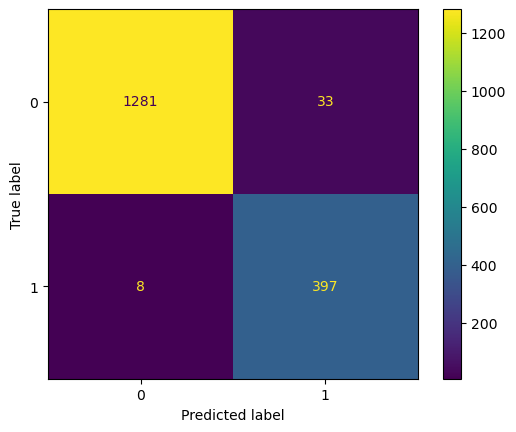

In [77]:
model.fit(X_train_tfidf,y_train)
y_pred = model.predict(X_test_tfidf)
print(classification_report(y_test,y_pred))
ConfusionMatrixDisplay.from_estimator(model,X_test_tfidf,y_test)

#### Logistic regression is found to be a good predictor of spam emails from the email text with 99% accuracy. 